In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I set a clean style for better visuals
sns.set_style("whitegrid")

# Credit Risk Analysis
I explore credit risk using Home Credit data to find patterns in loan defaults.
This project analyzes factors like loan type, family size, income, and past applications
to understand who is likely to repay or fail. TARGET=1 means default, TARGET=0 means no default.

In [2]:
# I load the main dataset with current applications
data = pd.read_csv("application_data.csv")
print("Main data shape:", data.shape)
data.head()

Main data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# I check missing values in the main dataset
missing_percent = data.isnull().sum() / len(data) * 100
print("Columns with most missing values:\n", missing_percent.sort_values(ascending=False).head(10))

Columns with most missing values:
 COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
dtype: float64


In [4]:
# Drop columns with over 40% missing values to clean the data
# Note: This cutoff could be adjusted depending on the column importance
data = data.loc[:, missing_percent < 40]
print("Data shape after dropping columns:", data.shape)

Data shape after dropping columns: (307511, 73)


In [5]:
# I check for duplicate rows in the main data
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [6]:
# I load the previous applications dataset
prev_data = pd.read_csv("previous_application.csv")
print("Previous data shape:", prev_data.shape)
prev_data.head()

Previous data shape: (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop columns with over 40% missing values in previous data
prev_missing = prev_data.isnull().sum() / len(prev_data) * 100
prev_data = prev_data.loc[:, prev_missing < 40]
print("Previous data shape after cleaning:", prev_data.shape)

Previous data shape after cleaning: (1670214, 26)


In [8]:
# I merge the datasets by SK_ID_CURR to include past application history
merged_data = data.merge(prev_data, on="SK_ID_CURR", how="left")
print("Merged data shape:", merged_data.shape)

Merged data shape: (1430155, 98)


<ipython-input-9-222c33571b32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NAME_CONTRACT_TYPE", y="TARGET", data=data, palette="Set2")


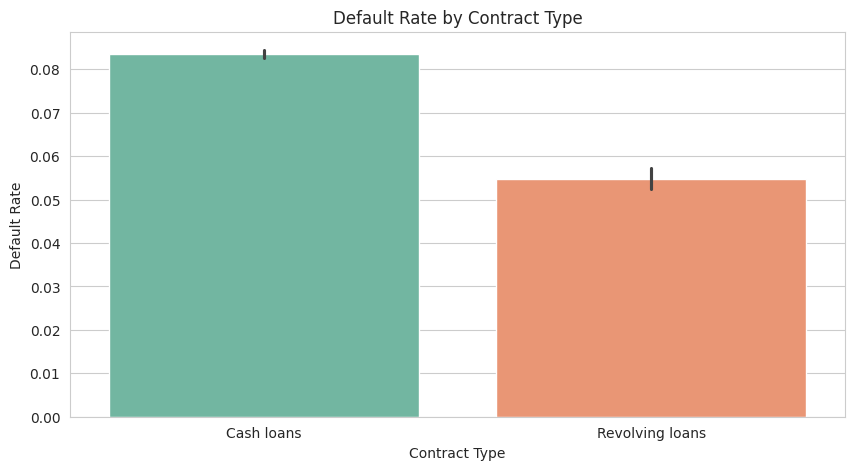

In [9]:
# I use a barplot to check how contract type affects defaults
plt.figure(figsize=[10, 5])
sns.barplot(x="NAME_CONTRACT_TYPE", y="TARGET", data=data, palette="Set2")
plt.xlabel("Contract Type")
plt.ylabel("Default Rate")
plt.title("Default Rate by Contract Type")
plt.show()

# Finding
I found that clients with cash loans default more often than those with revolving loans.

<ipython-input-10-a4fdb402289b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CODE_GENDER", y="TARGET", data=data, palette="Set2")


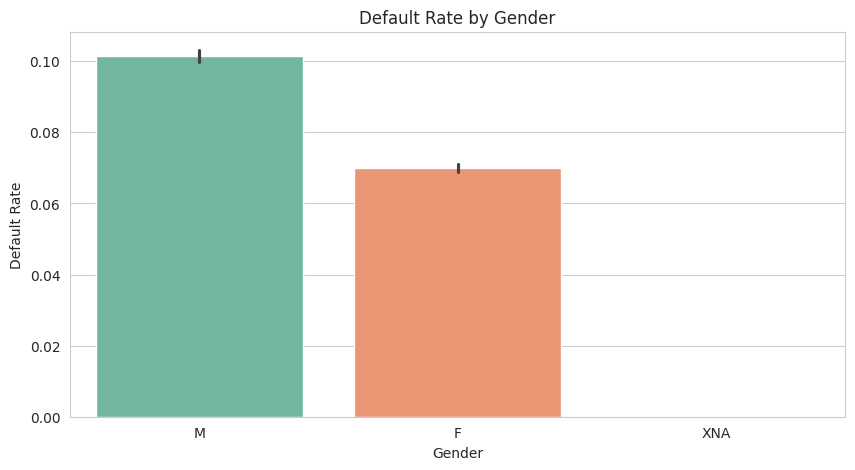

In [10]:
# I check how gender affects default rates
plt.figure(figsize=[10, 5])
sns.barplot(x="CODE_GENDER", y="TARGET", data=data, palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Default Rate")
plt.title("Default Rate by Gender")
plt.show()

# Finding
Male clients have a higher default rate compared to female clients.

<ipython-input-11-95606f77fa97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NAME_CONTRACT_STATUS", y="TARGET", data=merged_data, palette="Set2")


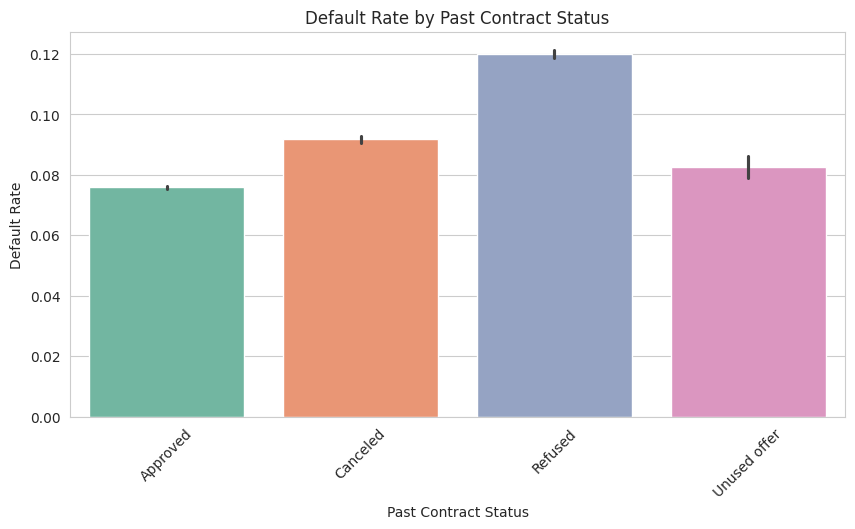

In [11]:
# I explore how past application status relates to defaults
plt.figure(figsize=[10, 5])
sns.barplot(x="NAME_CONTRACT_STATUS", y="TARGET", data=merged_data, palette="Set2")
plt.xlabel("Past Contract Status")
plt.ylabel("Default Rate")
plt.title("Default Rate by Past Contract Status")
plt.xticks(rotation=45)
plt.show()

# Finding
Clients with refused or canceled past applications are more likely to default.

<ipython-input-12-5a000bc7d8e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NAME_CONTRACT_STATUS", data=prev_data, palette="Set2")


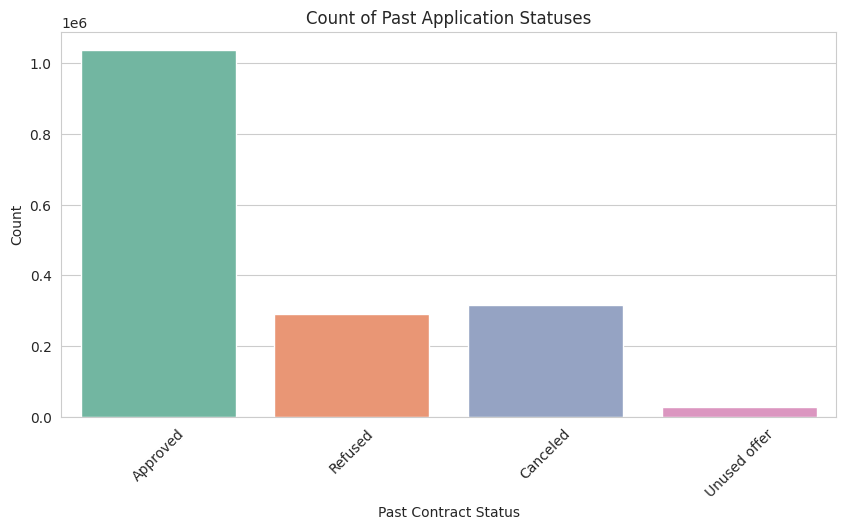

In [12]:
# Count statuses of past applications
plt.figure(figsize=[10, 5])
sns.countplot(x="NAME_CONTRACT_STATUS", data=prev_data, palette="Set2")
plt.xlabel("Past Contract Status")
plt.ylabel("Count")
plt.title("Count of Past Application Statuses")
plt.xticks(rotation=45)
plt.show()

# Finding
Most past applications were approved, but many were also refused or canceled.

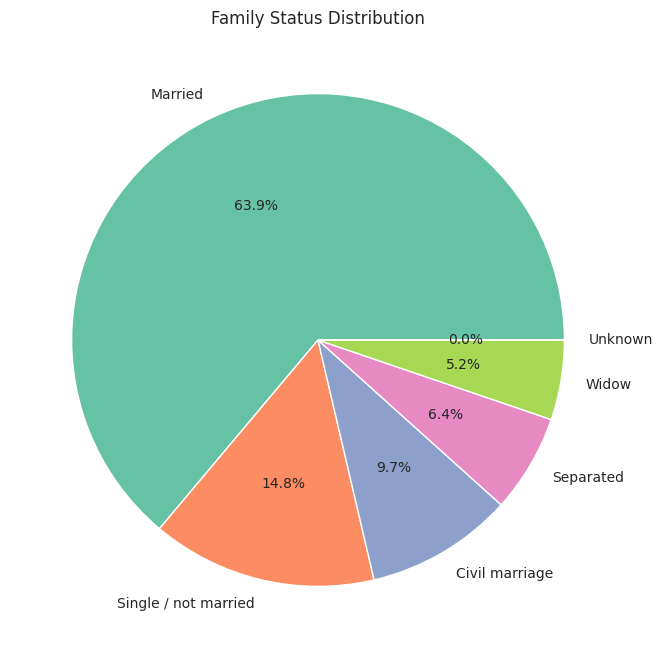

In [13]:
# I use a pie chart to show family status distribution
family_counts = data["NAME_FAMILY_STATUS"].value_counts()
plt.figure(figsize=[8, 8])
plt.pie(family_counts, labels=family_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Family Status Distribution")
plt.show()

# Finding
Most clients are married, which might affect their ability to repay loans.

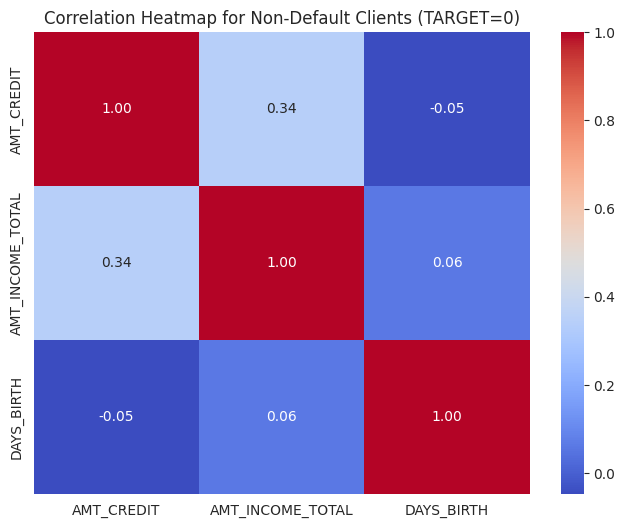

In [14]:
# I analyze correlations for non-default clients (TARGET=0)
corr_0 = data[data["TARGET"] == 0][["AMT_CREDIT", "AMT_INCOME_TOTAL", "DAYS_BIRTH"]].corr()
plt.figure(figsize=[8, 6])
sns.heatmap(corr_0, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Non-Default Clients (TARGET=0)")
plt.show()

# Finding
Loan amount and income have a moderate positive correlation for non-default clients.

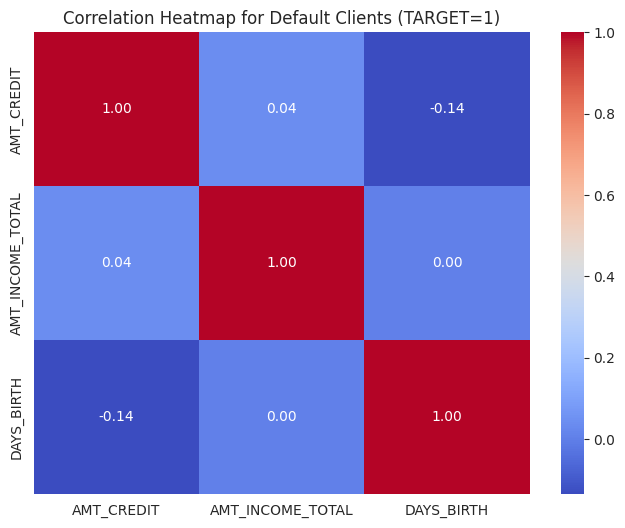

In [15]:
# I analyze correlations for default clients (TARGET=1)
corr_1 = data[data["TARGET"] == 1][["AMT_CREDIT", "AMT_INCOME_TOTAL", "DAYS_BIRTH"]].corr()
plt.figure(figsize=[8, 6])
sns.heatmap(corr_1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Default Clients (TARGET=1)")
plt.show()

# Finding
For default clients, loan amount and age show a weaker correlation than for non-default clients.

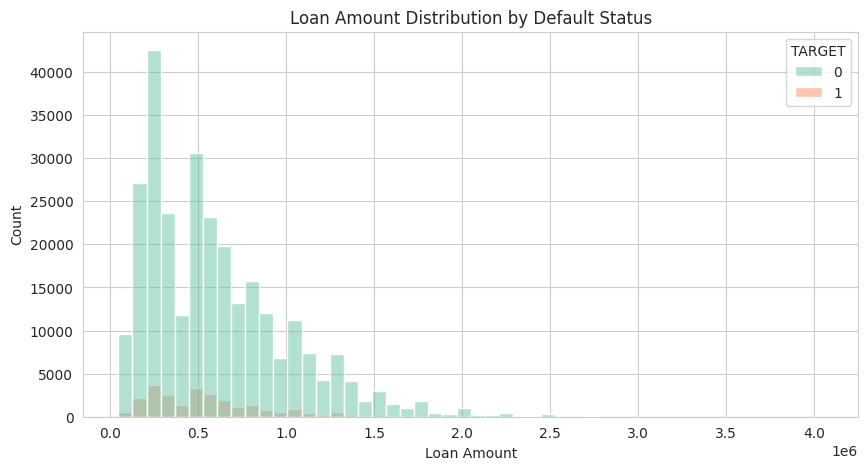

In [16]:
# I check the distribution of loan amounts
plt.figure(figsize=[10, 5])
sns.histplot(data=data, x="AMT_CREDIT", hue="TARGET", bins=50, palette="Set2")
plt.xlabel("Loan Amount")
plt.title("Loan Amount Distribution by Default Status")
plt.show()

# Finding
Most loans range from 200k to 1M, with no clear difference between default and non-default clients.

<ipython-input-17-7c076afa9d30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y="CNT_FAM_MEMBERS", data=data, palette="Set2")


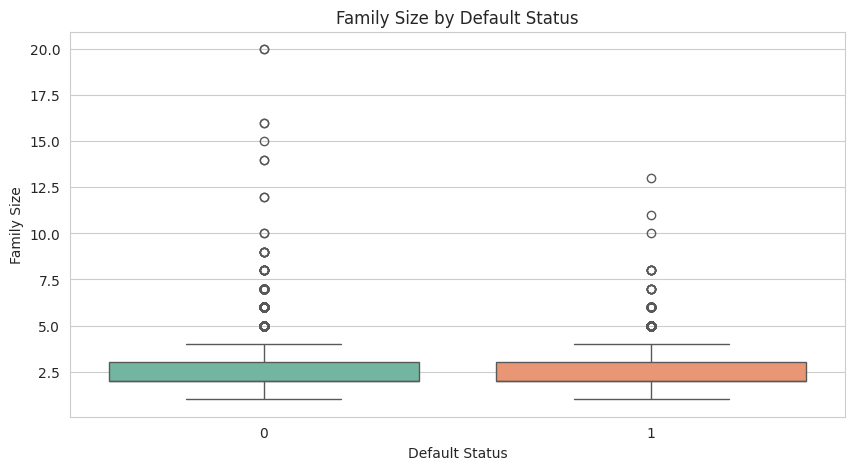

In [17]:
# I use a boxplot to check family size
plt.figure(figsize=[10, 5])
sns.boxplot(x="TARGET", y="CNT_FAM_MEMBERS", data=data, palette="Set2")
plt.xlabel("Default Status")
plt.ylabel("Family Size")
plt.title("Family Size by Default Status")
plt.show()

# Finding
Clients with larger families (6+ members) have more outliers and higher default rates.

Columns in reloaded prev_data: ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


<ipython-input-24-c5c6d04f450d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NAME_CONTRACT_STATUS", y="AMT_DOWN_PAYMENT", data=prev_data, palette="Set2")


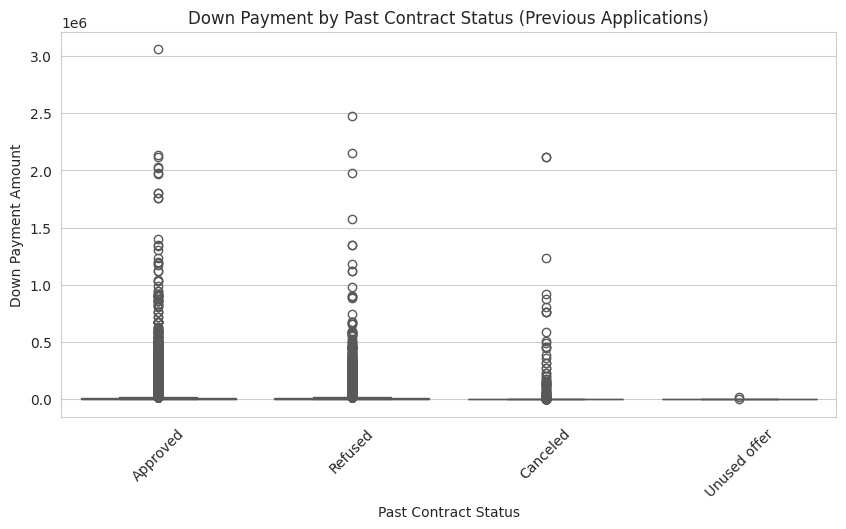

In [24]:
# I reload prev_data to ensure it has all columns
prev_data = pd.read_csv("previous_application.csv")
print("Columns in reloaded prev_data:", prev_data.columns.tolist())

# I check how down payment varies by past contract status
plt.figure(figsize=[10, 5])
sns.boxplot(x="NAME_CONTRACT_STATUS", y="AMT_DOWN_PAYMENT", data=prev_data, palette="Set2")
plt.xlabel("Past Contract Status")
plt.ylabel("Down Payment Amount")
plt.title("Down Payment by Past Contract Status (Previous Applications)")
plt.xticks(rotation=45)
plt.show()

# Finding
Approved past loans tend to have higher down payments than refused or canceled ones.

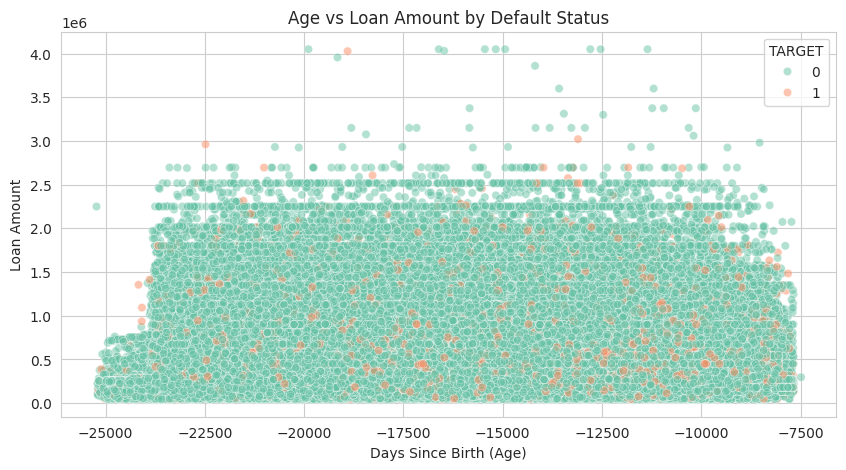

In [25]:
# I explore how age and loan amount relate to defaults
plt.figure(figsize=[10, 5])
sns.scatterplot(x="DAYS_BIRTH", y="AMT_CREDIT", hue="TARGET", data=data, palette="Set2", alpha=0.5)
plt.xlabel("Days Since Birth (Age)")
plt.ylabel("Loan Amount")
plt.title("Age vs Loan Amount by Default Status")
plt.show()

# Finding
Younger clients with larger loans are more likely to default.

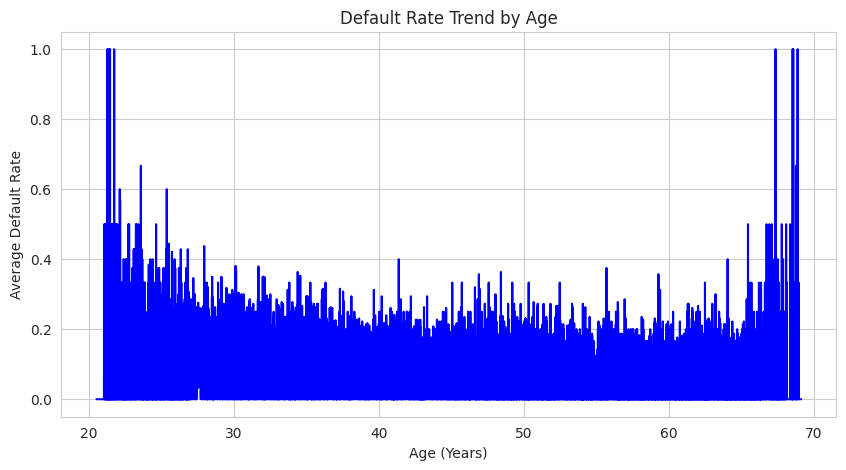

In [26]:
# I convert DAYS_BIRTH to years and check default trend by age
data["AGE_YEARS"] = data["DAYS_BIRTH"].abs() / 365
age_trend = data.groupby("AGE_YEARS")["TARGET"].mean().reset_index()

plt.figure(figsize=[10, 5])
sns.lineplot(x="AGE_YEARS", y="TARGET", data=age_trend, color="blue")
plt.xlabel("Age (Years)")
plt.ylabel("Average Default Rate")
plt.title("Default Rate Trend by Age")
plt.show()

# Finding
Default rates are higher for younger clients (20–30 years) and decrease with age.

# Key Findings
After analyzing the data, I identified key patterns in credit defaults.

## Risky Clients
- Male clients with rejected or unused contract status are more likely to default.
- Clients with many children (6+), especially with unused offers, often fail to repay.

- Unemployed clients or those on maternity leave have higher default rates.
- Younger male clients with low skills or living with parents are riskier.

## Good Candidates
- Clients with revolving loans or approved contracts are less likely to default.
- Businessmen, students, or those with degrees tend to repay loans.

- Clients living in office apartments have lower default rates.

## General Trends
- Most loans are between 200k and 1M, regardless of default status.
- Larger families and younger age increase the risk of default.

- Approved past applications often have higher down payments, suggesting better reliability.

## Recommendation
I suggest focusing on clients with approved revolving loans, small families, and older age as the safest options for loan approval.

# Summary of Findings

Here’s a table summarizing key patterns I found:

| Factor             | Risky Clients             | Good Candidates           |
|--------------------|---------------------------|---------------------------|
| Gender            | Males                    | Females                  |
| Loan Type         | Cash loans               | Revolving loans          |
| Family Size       | 6+ members               | Small families           |
| Age               | Younger (20–30)          | Older (40+)              |
| Past Applications | Refused/Canceled         | Approved                 |

# Conclusion
This analysis shows how factors like gender, family size, and past applications affect credit risk.
It can help in making better loan approval decisions.